<a href="https://colab.research.google.com/github/SimonGarcia01/eda_couse/blob/20241/basic_clasification_Simon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Cambios por Simon Garcia

# Importar bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split #lo que se importa para entrenar el modelo
from sklearn.ensemble import RandomForestClassifier #el modelo que se va a utilizar
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #Para analizar las metricas del modelo
import matplotlib.pyplot as plt #Para la visualizacion de los datos
import seaborn as sns #Para generar graficos

# Paso 1: Cargar el archivo CSV
ruta_archivo = 'https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/prediccion_prestamo_train.csv'  # Reemplaza con la ruta de tu archivo CSV
data = pd.read_csv(ruta_archivo)

In [2]:
# Paso 2: Análisis Exploratorio
# Puedes imprimir información básica sobre el conjunto de datos
print("Información del conjunto de datos:")
print(data.info())

# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())

Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       614 non-null    object 
 1   Genero                   601 non-null    object 
 2   Married                  611 non-null    object 
 3   dependientes             599 non-null    object 
 4    educacion               614 non-null    object 
 5    autoempleado            582 non-null    object 
 6    ingresos_solicitante    614 non-null    int64  
 7    ingresos_cosolicitante  614 non-null    float64
 8    monto_prestamo          592 non-null    float64
 9    plazo_prestamo          600 non-null    float64
 10   historial_crediticio    564 non-null    float64
 11   area_propiedad          614 non-null    object 
 12   estado_prestamo         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usa

In [3]:
data = data.dropna()

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       480 non-null    object 
 1   Genero                   480 non-null    object 
 2   Married                  480 non-null    object 
 3   dependientes             480 non-null    object 
 4    educacion               480 non-null    object 
 5    autoempleado            480 non-null    object 
 6    ingresos_solicitante    480 non-null    int64  
 7    ingresos_cosolicitante  480 non-null    float64
 8    monto_prestamo          480 non-null    float64
 9    plazo_prestamo          480 non-null    float64
 10   historial_crediticio    480 non-null    float64
 11   area_propiedad          480 non-null    object 
 12   estado_prestamo         480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB
None


In [5]:
# Visualizar las primeras filas del conjunto de datos
print("\nPrimeras filas del conjunto de datos:")
data.head(5)


Primeras filas del conjunto de datos:


,ID,Genero,Married,dependientes,educacion,autoempleado,ingresos_solicitante,ingresos_cosolicitante,monto_prestamo,plazo_prestamo,historial_crediticio,area_propiedad,estado_prestamo
1,LP001003,Hombre,Si,1,Graduado,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Hombre,Si,0,Graduado,Si,3000,0.0,66.0,360.0,1.0,Urbano,Y
3,LP001006,Hombre,Si,0,Not Graduado,No,2583,2358.0,120.0,360.0,1.0,Urbano,Y
4,LP001008,Hombre,No,0,Graduado,No,6000,0.0,141.0,360.0,1.0,Urbano,Y
5,LP001011,Hombre,Si,2,Graduado,Si,5417,4196.0,267.0,360.0,1.0,Urbano,Y


In [6]:
data[' area_propiedad'] = data[' area_propiedad'].replace({"Urbano": 1, "Rural": 0, "SemiUrbano": 2})
data[' area_propiedad'] = data[' area_propiedad'].astype(int)

data[' estado_prestamo'] = data[' estado_prestamo'].replace({"Y": 1, "N": 0})
data[' estado_prestamo'] = data[' estado_prestamo'].astype(int)

In [7]:
# Paso 3: Dividir el conjunto de datos en características (X) y etiquetas (y)
#Para agregar una variable debe haber un espacio antes " X"
X = data[[" ingresos_solicitante", " ingresos_cosolicitante", " monto_prestamo", " historial_crediticio", " area_propiedad"]] #Con lo que se predice
y = data[' estado_prestamo'] #Lo que se busca predecir

In [8]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0    ingresos_solicitante    480 non-null    int64  
 1    ingresos_cosolicitante  480 non-null    float64
 2    monto_prestamo          480 non-null    float64
 3    historial_crediticio    480 non-null    float64
 4    area_propiedad          480 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 22.5 KB
None


In [17]:
unique_values = data[' area_propiedad'].unique()
print(unique_values)

[0 1 2]


Index(['ID', 'Genero', 'Married', 'dependientes', ' educacion',
       ' autoempleado', ' ingresos_solicitante', ' ingresos_cosolicitante',
       ' monto_prestamo', ' plazo_prestamo', ' historial_crediticio',
       ' area_propiedad', ' estado_prestamo'],
      dtype='object')

In [10]:
X.head(5)

,ingresos_solicitante,ingresos_cosolicitante,monto_prestamo,historial_crediticio,area_propiedad
1,4583,1508.0,128.0,1.0,0
2,3000,0.0,66.0,1.0,1
3,2583,2358.0,120.0,1.0,1
4,6000,0.0,141.0,1.0,1
5,5417,4196.0,267.0,1.0,1


In [11]:
# Dividir el conjunto de datos en entrenamiento y prueba
#test_size = se usa el 20% de los datos para testear
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Paso 4: Entrenar un modelo de clasificación (usando Random Forest como ejemplo)
modelo = RandomForestClassifier(random_state=42) #se asegura que los resultados siempre den lo mismo
modelo.fit(X_train, y_train) #Para hacer el modelo como tal

RandomForestClassifier(random_state=42)


Precisión del modelo: 0.81


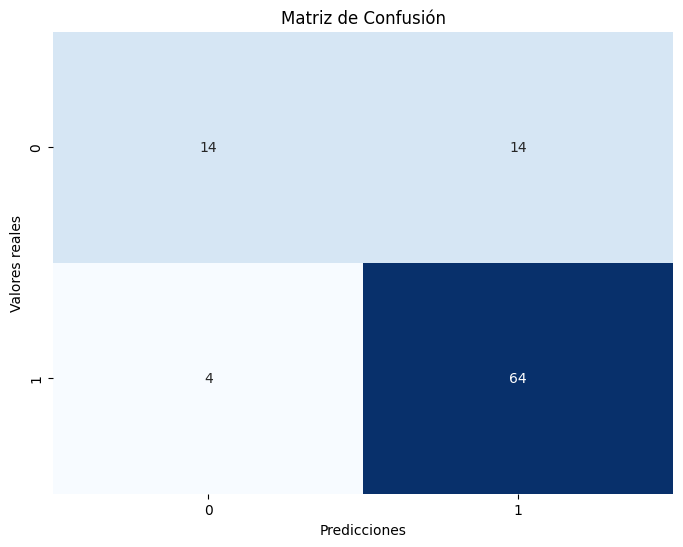


Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.78      0.50      0.61        28
           1       0.82      0.94      0.88        68

    accuracy                           0.81        96
   macro avg       0.80      0.72      0.74        96
weighted avg       0.81      0.81      0.80        96



In [12]:
# Paso 5: Evaluación del modelo
y_pred = modelo.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {precision:.2f}")

# Mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:")
print(informe_clasificacion)

In [13]:
# Paso 6: Guardar el modelo entrenado
import pickle

with open('modelo_prestamo.pkl', 'wb') as archivo_salida:
    pickle.dump(modelo, archivo_salida)

# Paso 7: Cargar el modelo entrenado
with open('modelo_prestamo.pkl', 'rb') as archivo_entrada:
    modelo_cargado = pickle.load(archivo_entrada)


In [14]:
# Ejercicio: Predecir si un préstamo será aprobado o no utilizando otras variables del conjunto de datos
